# Installation
To start your homework, you need to install requirements. We recommend that you use conda environment for this homework.
1. conda create -n ldhw1 python=3.8 numpy=1.23.5 matplotlib
2. conda activate ldhw1
3. conda install -c conda-forge notebook

Student: Muhammet Serdar NAZLI <br>
Number: 150210723

In [166]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Linear Regression
In this homework, it is expected that you implement linear regression problems with various solution approaches, including:

1. Solving using the Least Squares theorem.
2. Solving using Gradient Descent.


## 1. Least Square Problem 

In this section, your task is to use the least squares theorem to find a linear function that can best fit a data. The least squares theorem is a method for solving the problem of minimizing the squared errors between two values $(min_{x}|Ax-b|^2)$. This can be achieved by converting the linear regression problem to a least square problem, which can then be solved analytically using the least squares theorem. 

To provide your solution, please write your code in the designated space provided for the **leastSquares()** function in the **linearRegression.py** file.

## 1.1 1D Linear Regression
You have been provided a data that has been generated from the function $f(x) = 3.1*x + 2.5$. You don't need to change anything in the jupyter for this part. You can just write your answer to the given space in the **linearRegression.py** file. While you are coding, be careful about your code allows to operation for multi dimensional linear regression.


The **transform** and **inverse_transform** methods are part of the MinMaxScaler class, which is commonly used for feature scaling and normalization. Feature scaling is important in data preprocessing to ensure that features with larger values do not dominate the model training process. The transform method scales the input data to a desired range, while the **inverse_transform** method can be used to reverse this scaling operation. By implementing these methods in the linearRegression.py file, we can ensure that the input data is properly scaled and balanced, which can improve the performance of the linear regression model.

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from linearRegression import minMaxScaler, leastSquares, gradientDescent

# Data generation from the equation y = 3.1x + 2.5 + noise
np.random.seed(0)
nData = 200
rmvRatio = 0.25

# Raw data
x = np.arange(0, nData, 1)
x = np.expand_dims(x, axis=1)
y = 3.1*x+2.5

# Generate noisy data
xData_noisy = x + np.random.normal(0, 10, size=(nData,1))
yData_noisy = y + np.random.normal(0, 100, size=(nData,1))


# Sparse data
rmvIndx = np.random.randint(0, nData, int(nData*rmvRatio))
xData = np.delete(xData_noisy, rmvIndx,   axis=0)
yData = np.delete(yData_noisy, rmvIndx,   axis=0)

# Fit min max scaler
xScaler = minMaxScaler(xData)
yScaler = minMaxScaler(yData)

# Scale all the data
xScaled = xScaler.transform(x)
yScaled = yScaler.transform(y)
xDataScaled = xScaler.transform(xData)
yDataScaled = yScaler.transform(yData)

print(xData.shape)
print(yData.shape)


(157, 1)
(157, 1)


Implement **leastSquares** function in linearRegression.py file. The funciton convert the linear regression problem into least square problem and solves it analyticaly then returns with weigts.

Following cell plots the input data and the line fitted by the leastSquares function. This visualization can help to understand how well the linear regression model fits the data and whether any adjustments to the model are necessary.

Testing Linear Regresion Mean Square Error:
MSE:  0.00860073309442076


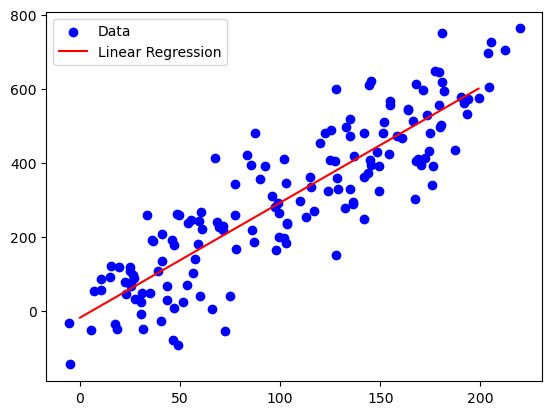

In [168]:
from linearRegression import leastSquares
# Solve the least squares problem, get the weights, print them
w = leastSquares(xDataScaled, yDataScaled)

#Predict y values for the data points
yPredictScaled = xScaled[:]*w[1] + w[0]
yDataPredictedScaled = xDataScaled[:]*w[1] + w[0]

# Calculate the error for the XData and YData
mse = np.sqrt(np.sum(np.square(yDataPredictedScaled - yDataScaled)))/yData.shape[0]
print('Testing Linear Regresion Mean Square Error:')
print('MSE: ', mse)
assert 0.0087> mse

# Inverse transform the predicted data
yPredict = yScaler.inverse_transform(yPredictScaled)

#Plot the data and the linear regression result
plt.scatter(xData, yData, c='b', label='Data')
plt.plot(x, yPredict, 'r')
plt.legend(['Data','Linear Regression'])

## 1.2 2D Linear Regression 

In this section, a dataset consisting of two variables $(x_1$ and $x_2)$ is provided. It should be noted that no additional steps are required beyond those used in the previous 1D case if one's code is designed for 2D matrix operations.

For 2D least square method calculations, it is recommended that you remove the noise in **x2Data_noisy** and investigate why the method is not finding a correct solution. This will help you understand how important the rank of a matrix is for matrix operations.

In [169]:
nData = 100
rmvRatio = 0.5
np.random.seed(0)

# Data generation from the equation y = 3.1*x_1 + 5*x_2 + 2.5
x2 = np.linspace([-100,-5], [200,10], nData)
y2 = 3.1*x2[:,0:1] + 5*x2[:,1:2] + 2.5

# Add noise to the data
x2Data_noisy = x2 + np.random.normal(0, 1, size=(nData,2))
y2Data_noisy = y2 + np.random.normal(0, 100, size=(nData,1))

# Create a raw data by removing random data points
rmvIndx = np.random.randint(0, nData, int(nData*rmvRatio))
x2Data = np.delete(x2Data_noisy, rmvIndx,axis=0)
y2Data = np.delete(y2Data_noisy, rmvIndx,axis=0)

# Fit min max scaler
x2Scaler = minMaxScaler(x2Data)
y2Scaler = minMaxScaler(y2Data)

# Scale all the data
x2Scaled = x2Scaler.transform(x2)
y2Scaled = y2Scaler.transform(y2)
x2DataScaled = x2Scaler.transform(x2Data)
y2DataScaled = y2Scaler.transform(y2Data)



[[ 0.08205584]
 [ 0.89922078]
 [-0.04604873]]
Testing Linear Regresion Mean Square Error:
MSE:  0.0037023622946554743


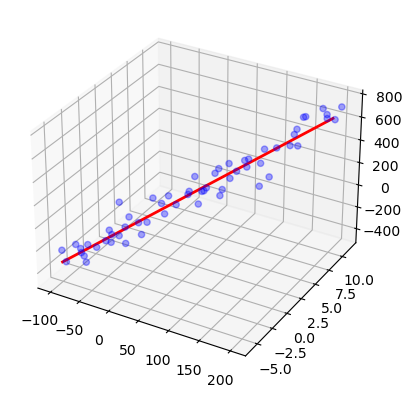

In [170]:

w = leastSquares(x2DataScaled, y2DataScaled)
print(w)
# Predict scaled y values for the scaled data points
y2PredictScaled = np.dot(x2Scaled[:,0:2],w[1:3])+w[0]
y2DataPredictScaled = np.dot(x2DataScaled[:,0:2],w[1:3])+w[0]

y2Predict = y2Scaler.inverse_transform(y2PredictScaled)
# Calculate the error for the Scaled XData and YData
mse = np.sqrt(np.sum(np.square(y2DataPredictScaled - y2DataScaled)))/yData.shape[0]
print('Testing Linear Regresion Mean Square Error:')
print('MSE: ', mse)
assert 0.0038 > mse

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2Data[:,0:1], x2Data[:,1:2], y2Data, c='b', label='Data',alpha=0.35)
ax.plot(x2[:,0:1], x2[:,1:2], y2Predict, 'r',lw=2)

## 2. Gradient Descent
In this section, you will need to implement a gradient descent algorithm for multi-dimensional data. To do this, you should add your code to the designated blank space within the **gradient()** and **fit()** functions of the **GradientDescent()** class, as indicated in the linearRegression.py file. The **gradient()** function should compute the gradient of the cost function for the given dataset and current weights, while the **fit()** function should update the weights iteratively until convergence is achieved.

To verify the correctness of your implementation, you can test it using the provided code in the following two sections. These tests will help you to identify and fix any errors in your gradient descent algorithm.

#### 2.1 Gradient Calculation
Next code block can be used to check your gradient calculation in the function **gradient()**. If the gradient calculation is incorrect, an error will be raised.

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from linearRegression import gradientDescent, rel_error

np.random.seed(0)

# Set the learning rate and maximum number of iterations
lr = 0.1
max_iterations = 100

# Generate some sample data
xg = 2 * np.random.rand(100, 1)
yg = 4 + 3 * xg + np.random.randn(100, 1)

# Weight initialization
w = np.random.randn(xg.shape[1]+1,1)

# Gradient Descent
a1 = gradientDescent(xg, yg, w, lr, max_iterations)

expected_gradient = np.array([[-8.68322829],
                             [-9.65481562]])

rer = rel_error(a1.gradient(),expected_gradient)

try:
    assert rer<1e-6
    print("Gradient is correct.")
    print("Releative error: ", rer)
    print("Gradient: ", a1.gradient())
except AssertionError:    
    print("Gradient calculation is not working correctly")
    print("Releative error: ", rer)
    print("Gradient: ", a1.gradient())
    assert rer<1e-6


Gradient is correct.
Releative error:  2.7186464490922545e-10
Gradient:  [[-8.68322829]
 [-9.65481562]]


#### 2.2 Gradient Descent Algorithm
The following code snippet can be used to test the gradient descent algorithm implemented in the **fit()** function. It iterates one step further in the algorithm and if the implementation is incorrect, an error will be raised.

In [172]:
# One step gradient decent
student_w,_ = a1.fit(n_iterations=1)

expected_w = np.array([[ 0.51432892],
                        [-0.40946973]])
rer_w = rel_error(student_w,expected_w)

try:
    assert rer_w<1e-6
    print("Gradient descent is correct.")
    print("Releative error: ", rer_w)
    print("Gradient: ", np.array(student_w))
except AssertionError:
    print("Gradient descent is not working correctly")
    print("Releative error: ", rer_w)
    print("Gradient: ", np.array(student_w))    
    assert rer_w<1e-6


Gradient descent is correct.
Releative error:  1.7317237194841533e-09
Gradient:  [[ 0.51432892]
 [-0.40946973]]


The following code iterates the gradient descent algorithm (fit()) until convergence. 

!!! If the fit() function is not provided any arguments, it uses the previously defined learning rate and iterates until the maximum number of iterations or convergence is achieved.

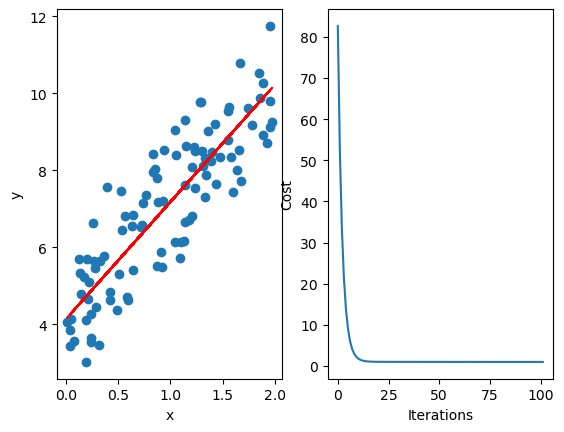

In [173]:
# Iterate gradient decet until convergence starting from the first step
a1.fit()

# Plot the data and the linear regression result
plt.subplot(1, 2, 1)
plt.scatter(xg, yg)
plt.plot(xg, a1.predict(a1.x), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1, 2, 2)
plt.plot(a1.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.show()

### 2.3 Training with diminishing learning rate
If the fit() function is called with lr="diminishing" as an argument, the gradient descent algorithm updates the model parameters by computing the gradients at each iteration with a decreasing learning rate. The learning rate decreases over time (with formula $1/(k+1)$), which helps the algorithm to converge more efficiently to the optimal solution.

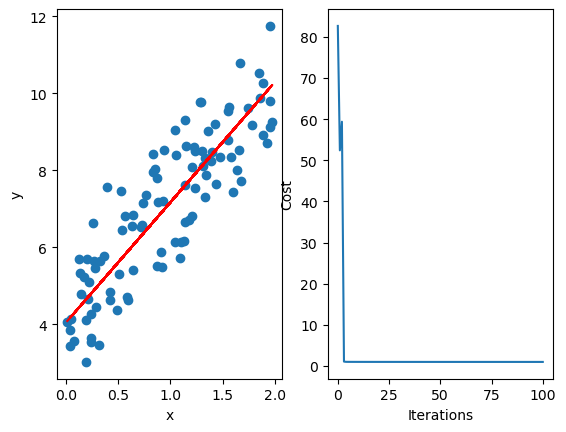

In [174]:
# Gradient Descent
a2 = gradientDescent(xg, yg, w, lr, max_iterations)
a2.fit("diminishing")
# Plot the data and the linear regression result
plt.subplot(1, 2, 1)
plt.scatter(xg, yg)
plt.plot(xg, a2.predict(a2.x), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1, 2, 2)
plt.plot(a2.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### 2.4 Training with various Hyper Parameters

#### 2.4.1 Learning Rate

There is a list of learning rates to be used in a test loop, and you are going to fit a line to the given data ($xg,yg$) using these **lr** and plot their respective cost history.

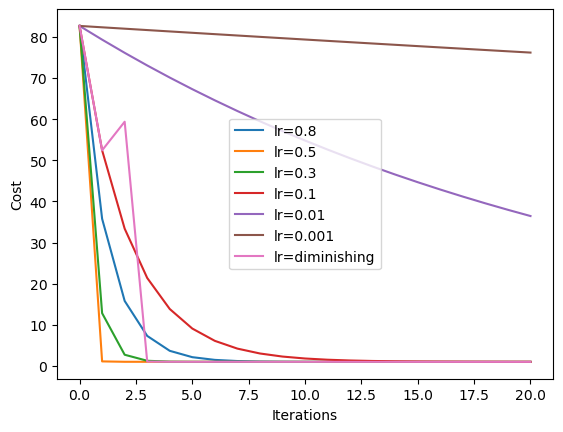

In [175]:
learning_rates = [0.8, .5, .3, .1, .01, .001, "diminishing"]

# Fit line and plot learning process for different learning rate
for ilr in learning_rates:
    a3 = gradientDescent(xg, yg, w, lr, max_iterations)
    a3.fit(ilr,20)
    plt.plot(a3.cost_history, label=ilr)



plt.legend(['lr=0.8','lr=0.5','lr=0.3','lr=0.1','lr=0.01','lr=0.001','lr=diminishing'])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

#### 2.4.2 Weight Initialization
We will test weights with a constant learning rate of 0.5 that we found in the previous section, as it has a faster convergence rate.

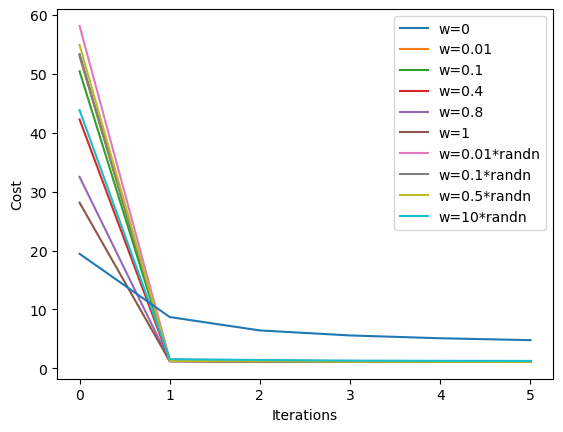

In [176]:
np.random.seed(1005)
weights = np.zeros((11, w.shape[0], w.shape[1]))
weights[1,:,:] = 0.01*np.ones((xg.shape[1]+1,1))
weights[2,:,:] = 0.1*np.ones((xg.shape[1]+1,1))
weights[3,:,:] = 0.4*np.ones((xg.shape[1]+1,1))
weights[4,:,:] = 0.8*np.ones((xg.shape[1]+1,1))
weights[5,:,:] = np.ones((xg.shape[1]+1,1))
weights[6,:,:]= np.random.randn(xg.shape[1]+1,1)
weights[7,:,:] = 0.01*np.random.randn(xg.shape[1]+1,1)
weights[8,:,:] = 0.1*np.random.randn(xg.shape[1]+1,1)
weights[9,:,:] = 0.5*np.random.randn(xg.shape[1]+1,1)
weights[10,:,:] = 10*np.random.randn(xg.shape[1]+1,1)

# Fit line and plot learning process for different weight initialization for lr=.5
lr = 0.5
for iw in weights:
    a4 = gradientDescent(xg, yg, iw, lr, max_iterations)
    a4.fit(ilr,5)
    plt.plot(a4.cost_history, label=ilr)
plt.legend(["w=0", "w=0.01", "w=0.1", "w=0.4", "w=0.8", "w=1", "w=0.01*randn", "w=0.1*randn", "w=0.5*randn", "w=10*randn"])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


#### 2.5 Fitting Line on Bigger Dataset

You have been provided with a dataset **(data.npy)** consisting of eight dimensions as features and one dimension for regression. The data is also scaled. You don't need any scale operation. Your task is to identify the optimal hyperparameters, including the learning rate and initial weights, to fit a line to the data using gradient descent. 

To fine-tune the hyperparameters, it is recommended that you first select a random 25% subset of your dataset and use it to determine the optimal learning rate. After that, you can proceed to find the optimal weight initialization using this smaller subset of data. Once you have identified all the optimal hyperparameters, you can then fit a line to the entire dataset.

During the process of parameter tuning and fitting the line, plot cost functions and put legend on it as you are shown beforehand. (There should be 3 cost graph.)

In [177]:
Data = np.load('data.npy')
x = Data[:,:-1] # 8 features
y = Data[:,-1:] # 1 label
print(x.shape)
print(y.shape)

(490, 8)
(490, 1)


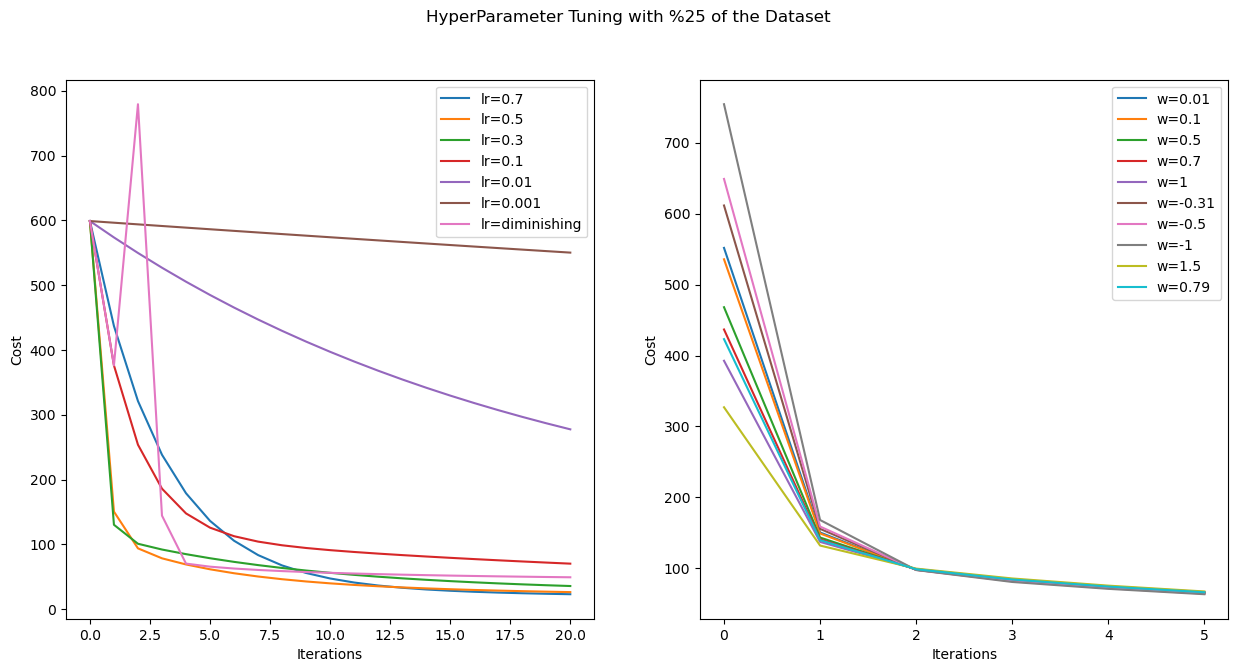

In [178]:
##############################################################################
# TODO: Do all your parameter seearch task here                              #
# Plot all cost history for different learning rates and different           #
# initial weights.                                                           #
##############################################################################

# Replace "pass" statement with your code



####### SUBSET PART #########

sub_size = int(x.shape[0] * 0.25)
# Choosing random indexes without replacement.
sub_indexes = np.random.choice(x.shape[0],sub_size, replace=False)
x_sub = x[sub_indexes]
y_sub = y[sub_indexes]

###### LEARNING RATE HYPERPARAMETER TUNING PART ######

lr = 0.1
max_iterations = 100

# Weight initialization
w = np.random.randn(x_sub.shape[1]+1,1)



fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

learning_rates = [.7, .5, .3, .1, .01, .001, "diminishing"]

# Fit line and plot learning process for different learning rate
for ilr in learning_rates:
    lin_reg = gradientDescent(x_sub, y_sub, w, lr, max_iterations)
    lin_reg.fit(ilr,20)
    axes[0].plot(lin_reg.cost_history, label=ilr)



axes[0].legend(['lr=0.7','lr=0.5','lr=0.3','lr=0.1','lr=0.01','lr=0.001','lr=diminishing'])
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Cost')


#axes[0].set_ylim(0,500)




###### INITIAL WEIGHT HYPERPARAMETER TUNING PART ######

weights = np.zeros((10, w.shape[0], w.shape[1]))
weights[0,:,:] = 0.01*np.ones((x_sub.shape[1]+1,1))
weights[1,:,:] = 0.1*np.ones((x_sub.shape[1]+1,1))
weights[2,:,:] = 0.5*np.ones((x_sub.shape[1]+1,1))
weights[3,:,:] = 0.7*np.ones((x_sub.shape[1]+1,1))
weights[4,:,:] = 1*np.ones((x_sub.shape[1]+1,1))
weights[5,:,:] = -0.31*np.ones((x_sub.shape[1]+1,1))
weights[6,:,:] = -0.5*np.ones((x_sub.shape[1]+1,1))
weights[7,:,:] = -1*np.ones((x_sub.shape[1]+1,1))
weights[8,:,:] = 1.5*np.ones((x_sub.shape[1]+1,1))
weights[9,:,:] = 0.79*np.ones((x_sub.shape[1]+1,1))

# 0.5 is chosen. Look at the first graph. 
lr = 0.5
for iw in weights:
    lin_reg2 = gradientDescent(x_sub, y_sub, iw, lr, max_iterations)
    lin_reg2.fit(lr,5)
    axes[1].plot(lin_reg2.cost_history,label=iw)
axes[1].legend(["w=0.01", "w=0.1", "w=0.5", "w=0.7", "w=1", "w=-0.31", "w=-0.5","w=-1","w=1.5","w=0.79"])
axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Cost')

fig.suptitle("HyperParameter Tuning with %25 of the Dataset")
plt.show()



##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################


Last cost:  17.929238702800312


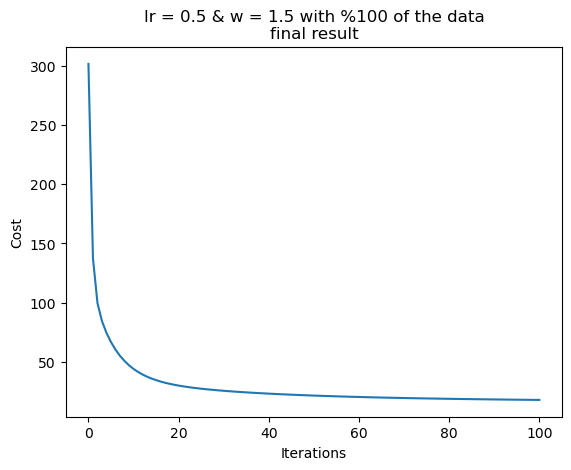

In [179]:
##############################################################################
# TODO: Do line fitting task here                                        #
# Plot all cost history for different learning rates and different           #
##############################################################################

# Replace "pass" statement with your code
w = 1.5*np.ones((x.shape[1]+1,1))
lr = 0.5 
max_iter = 100
lin_reg = gradientDescent(x,y,w,lr,max_iter)
lin_reg.fit()


plt.plot(lin_reg.cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("lr = 0.5 & w = 1.5 with %100 of the data\nfinal result")

print("Last cost: ", lin_reg.cost_history[-1])
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################